<a href="https://colab.research.google.com/github/410225/Smart-Traffic-Management/blob/main/smart_traffic_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\user\Downloads\traffic_data.csv")

In [ ]:
df.head()

,Timestamp,Junction_ID,Vehicles,Day_Type,Weather,Incident
0,2017-07-01 00:00:00,J1,0,Weekend,Sunny,No
1,2017-07-01 00:00:00,J2,11,Weekend,Sunny,No
2,2017-07-01 00:00:00,J3,12,Weekend,Sunny,No
3,2017-07-01 00:00:00,J4,0,Weekend,Rainy,No
4,2017-07-01 00:15:00,J1,9,Weekend,Sunny,No


In [ ]:
#Geting basic info on the data

In [ ]:
#structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46852 entries, 0 to 46851
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    46852 non-null  object
 1   Junction_ID  46852 non-null  object
 2   Vehicles     46852 non-null  int64 
 3   Day_Type     46852 non-null  object
 4   Weather      46852 non-null  object
 5   Incident     46852 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df.describe(include='all')

,Timestamp,Junction_ID,Vehicles,Day_Type,Weather,Incident
count,46852,46852,46852.000000,46852,46852,46852
unique,11713,4,NaN,3,3,2
top,2017-07-01 00:00:00,J1,NaN,Weekday,Sunny,No
freq,4,11713,NaN,31876,32637,44540
mean,NaN,NaN,27.355310,NaN,NaN,NaN
std,NaN,NaN,27.736583,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,8.000000,NaN,NaN,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN
75%,NaN,NaN,32.000000,NaN,NaN,NaN


In [ ]:
#Converting Timestamp to DateTime Format

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()

df.head()

,Timestamp,Junction_ID,Vehicles,Day_Type,Weather,Incident,Hour,Day,Month,Weekday
0,2017-07-01 00:00:00,J1,0,Weekend,Sunny,No,0,1,7,Saturday
1,2017-07-01 00:00:00,J2,11,Weekend,Sunny,No,0,1,7,Saturday
2,2017-07-01 00:00:00,J3,12,Weekend,Sunny,No,0,1,7,Saturday
3,2017-07-01 00:00:00,J4,0,Weekend,Rainy,No,0,1,7,Saturday
4,2017-07-01 00:15:00,J1,9,Weekend,Sunny,No,0,1,7,Saturday


In [ ]:
#Visualizasio1 : Average Traffic by Hour of the Day

C:\Users\user\AppData\Local\Temp\ipykernel_6032\4228266136.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Vehicles', estimator='mean', ci=None)


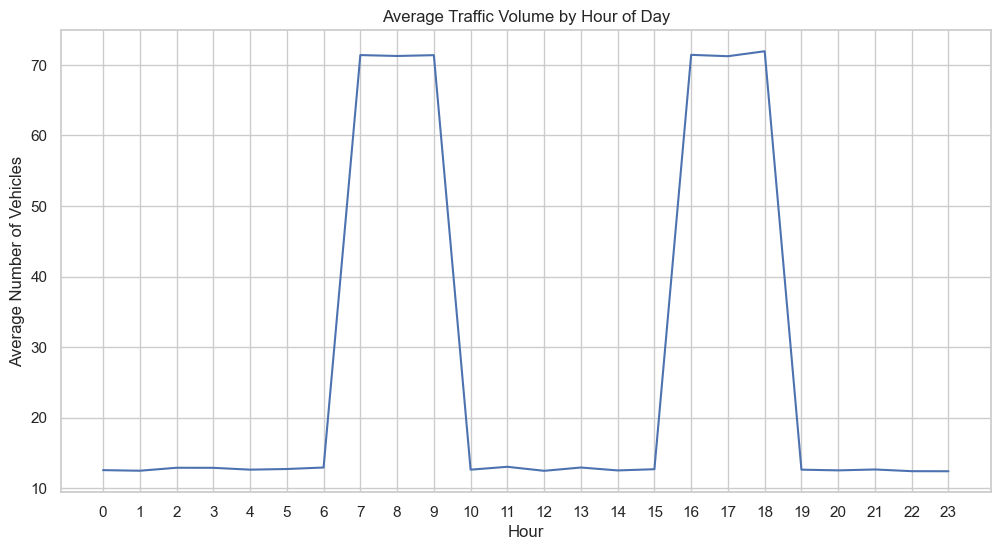

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Plot average vehicles by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Vehicles', estimator='mean', ci=None)
plt.title("Average Traffic Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.show()

In [ ]:
#Comparing traffic by junction

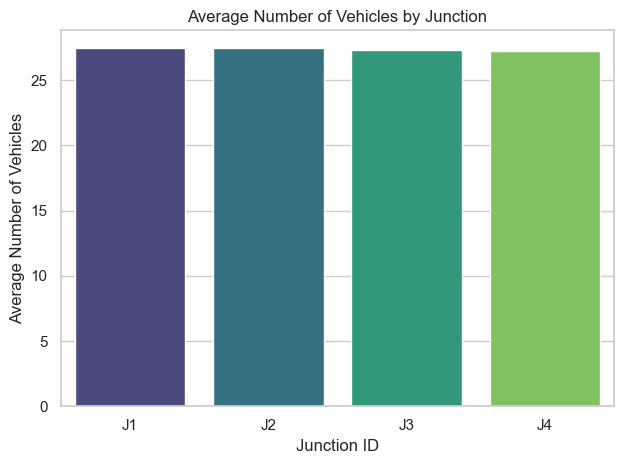

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated barplot with current syntax
sns.barplot(
    data=df,
    x='Junction_ID',
    y='Vehicles',
    estimator='mean',
    errorbar=None,  # Replaces ci=None
    hue='Junction_ID',  # Add this to use palette properly
    legend=False,  # Hide the legend since it would be redundant
    palette='viridis'
)

plt.title('Average Number of Vehicles by Junction')
plt.xlabel('Junction ID')
plt.ylabel('Average Number of Vehicles')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6032\2100126910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day_Type', y='Vehicles', palette='pastel')


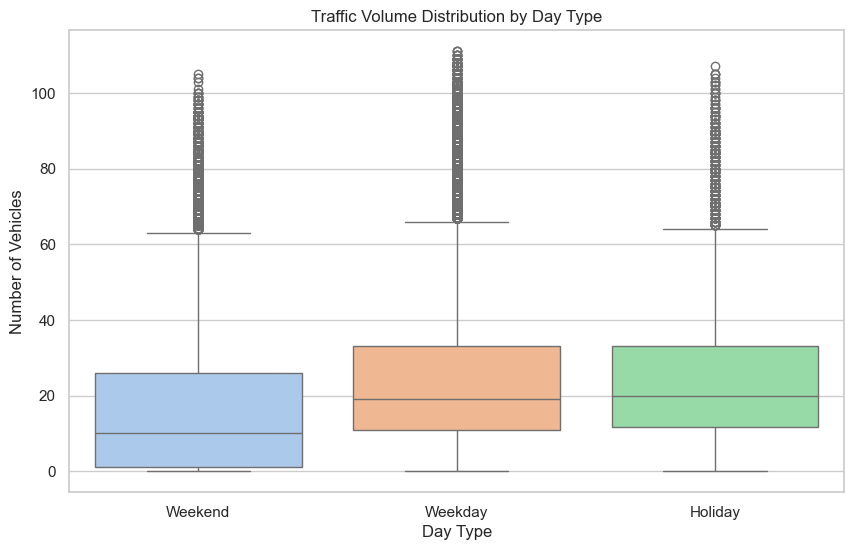

In [ ]:
# Average traffic by day type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day_Type', y='Vehicles', palette='pastel')
plt.title("Traffic Volume Distribution by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Number of Vehicles")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6032\3061291701.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Vehicles', hue='Day_Type', estimator='mean', ci=None)


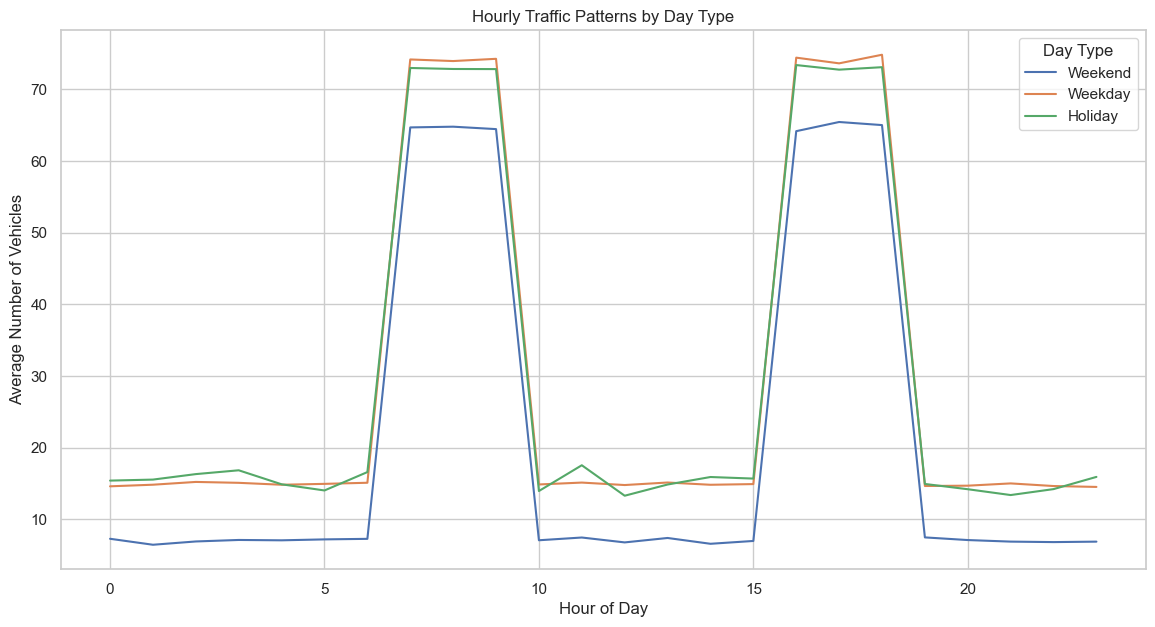

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Hour', y='Vehicles', hue='Day_Type', estimator='mean', ci=None)
plt.title("Hourly Traffic Patterns by Day Type")
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Vehicles")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

In [ ]:
#Preparing the Timeseries for the ARIMA model

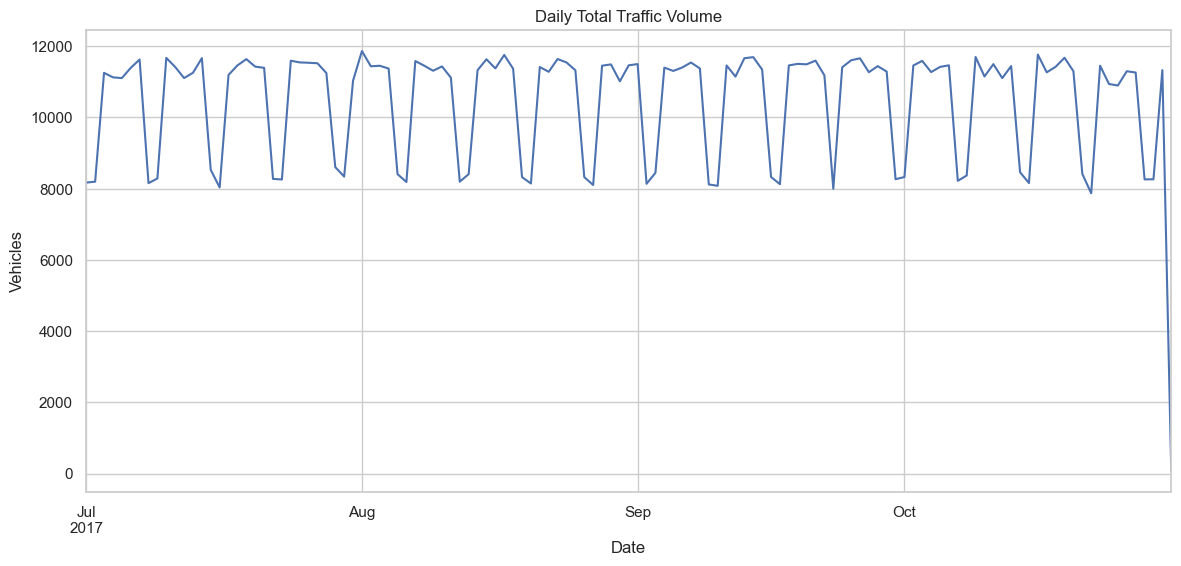

In [ ]:
# Group data to get daily total traffic
df_daily = df.groupby(df['Timestamp'].dt.date)['Vehicles'].sum()
df_daily.index = pd.to_datetime(df_daily.index)
df_daily = df_daily.asfreq('D')  # Ensure daily frequency

# Plot to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df_daily.plot(title="Daily Total Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.grid(True)
plt.show()

In [ ]:
#Checking stationarity : If p-value < 0.05 (data is stationery, we move on) but, if p-value is >= 0.05 (we need to apply differencing inside the model)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.37899065341615545
p-value: 0.9806920372940002


In [ ]:
#Fitting the ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the model (p=5, d=1, q=0 is a common starting point)
model = ARIMA(df_daily, order=(5, 1, 0))  # Feel free to tune these
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  123
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1072.605
Date:                Sat, 19 Apr 2025   AIC                           2157.210
Time:                        02:06:22   BIC                           2174.034
Sample:                    07-01-2017   HQIC                          2164.044
                         - 10-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3044      0.117     -2.609      0.009      -0.533      -0.076
ar.L2         -0.5281      0.080     -6.572      0.000      -0.686      -0.371
ar.L3         -0.3730      0.104     -3.576      0.0

In [ ]:
#Forecast for the next week

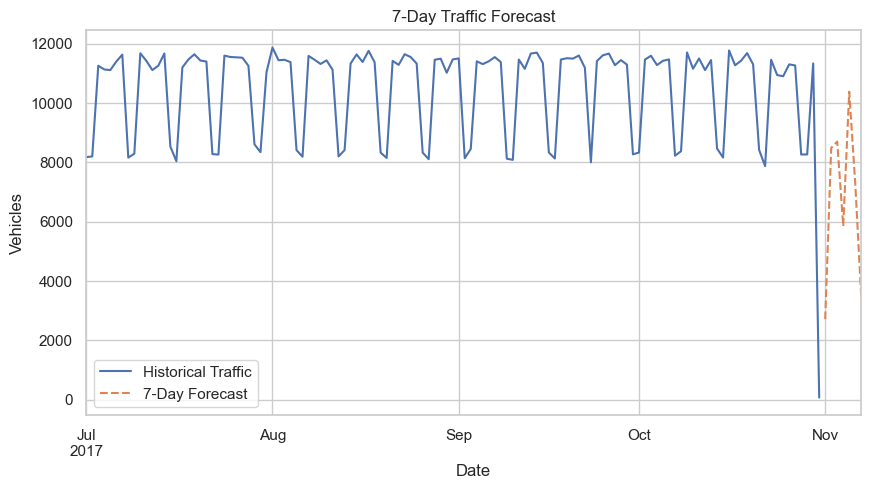

In [ ]:
# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Plot
plt.figure(figsize=(10, 5))
df_daily.plot(label='Historical Traffic')
forecast.plot(label='7-Day Forecast', linestyle='--')
plt.title("7-Day Traffic Forecast")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Forecasting by day type

In [ ]:
# Add 'Date' column for grouping
df['Date'] = df['Timestamp'].dt.date

# Group by Date and Day_Type
daily_type = df.groupby(['Date', 'Day_Type'])['Vehicles'].sum().reset_index()

# Pivot so each Day_Type becomes its own time series
pivot_type = daily_type.pivot(index='Date', columns='Day_Type', values='Vehicles')
pivot_type.index = pd.to_datetime(pivot_type.index)
pivot_type = pivot_type.asfreq('D')  # Ensure it's regular time series
pivot_type.head()


Day_Type,Holiday,Weekday,Weekend
Date,,,
2017-07-01,NaN,NaN,8171.0
2017-07-02,NaN,NaN,8196.0
2017-07-03,NaN,11253.0,NaN
2017-07-04,NaN,11127.0,NaN
2017-07-05,NaN,11105.0,NaN


In [ ]:
#Forcasting Weekdays Traffic with ARIMA

C:\Users\user\AppData\Local\Temp\ipykernel_6032\32845998.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekday_series = pivot_type['Weekday'].fillna(method='ffill')
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


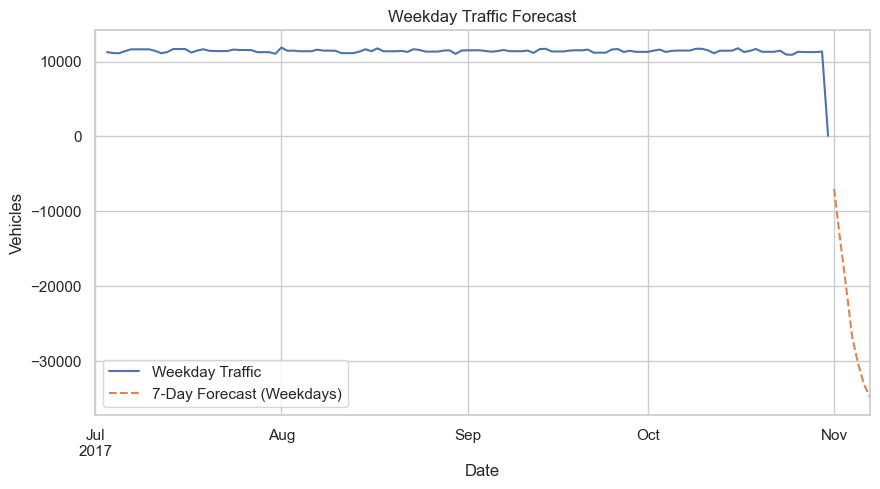

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fill missing values (holidays/weekends may leave gaps)
weekday_series = pivot_type['Weekday'].fillna(method='ffill')

# Fit ARIMA model
model_weekday = ARIMA(weekday_series, order=(5, 1, 0))
model_fit_weekday = model_weekday.fit()

# Forecast
forecast_weekday = model_fit_weekday.forecast(steps=7)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekday_series.plot(label='Weekday Traffic')
forecast_weekday.plot(label='7-Day Forecast (Weekdays)', linestyle='--')
plt.title("Weekday Traffic Forecast")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fill missing values
weekday_series = pivot_type['Weekday'].fillna(method='ffill')

# Apply log transformation (add 1 to avoid log(0))
log_weekday = np.log1p(weekday_series)


C:\Users\user\AppData\Local\Temp\ipykernel_6032\252031342.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekday_series = pivot_type['Weekday'].fillna(method='ffill')


In [ ]:
# Fit ARIMA model on log-transformed data
model_log = ARIMA(log_weekday, order=(5, 1, 0))
model_fit_log = model_log.fit()


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Forecast in log space
forecast_log = model_fit_log.forecast(steps=7)

# Convert forecast back to original scale using expm1 (inverse of log1p)
forecast_corrected = np.expm1(forecast_log)

# Ensure no negative values
forecast_corrected = forecast_corrected.clip(lower=0)


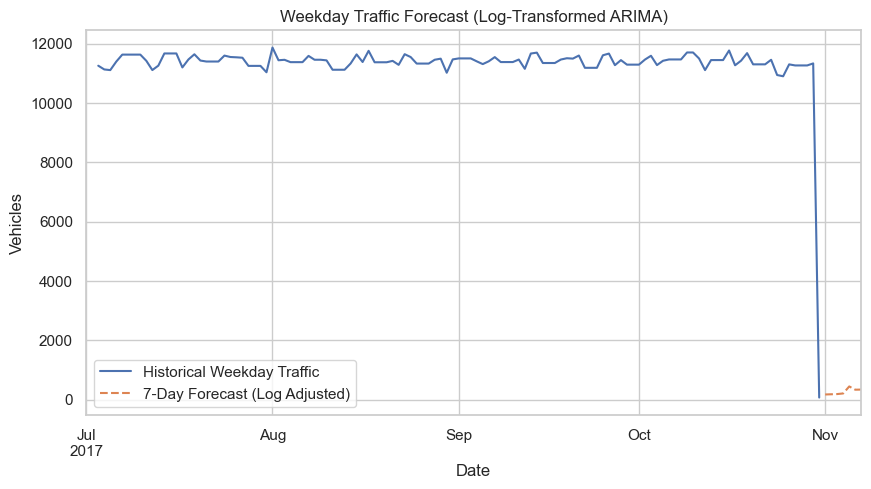

In [ ]:
# Plot historical and forecasted weekday traffic
plt.figure(figsize=(10, 5))
weekday_series.plot(label='Historical Weekday Traffic')
forecast_corrected.plot(label='7-Day Forecast (Log Adjusted)', linestyle='--')
plt.title("Weekday Traffic Forecast (Log-Transformed ARIMA)")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima


In [ ]:
# Ensure all NaNs are handled properly
weekday_series = pivot_type['Weekday'].fillna(method='ffill').fillna(method='bfill')
log_weekday = np.log1p(weekday_series)  # log1p handles log(0) safely


C:\Users\user\AppData\Local\Temp\ipykernel_6032\529604579.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekday_series = pivot_type['Weekday'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
from pmdarima import auto_arima

model_auto = auto_arima(
    log_weekday,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=False,
    stepwise=True
)

print(model_auto.summary())


Performing stepwise search to minimize aic


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=899.943, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=169.995, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=171.993, Time=0.19 sec


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.38 sec


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.370 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -81.998
Date:                Sat, 19 Apr 2025   AIC                            169.995
Time:                        02:52:50   BIC                            178.432
Sample:                    07-01-2017   HQIC                           173.422
                         - 10-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.089     11.222      0.000       0.824      

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast 7 days ahead
n_days = 7
forecast_log_auto = model_auto.predict(n_periods=n_days)

# Convert back from log scale
forecast_auto = np.expm1(forecast_log_auto).clip(lower=0)


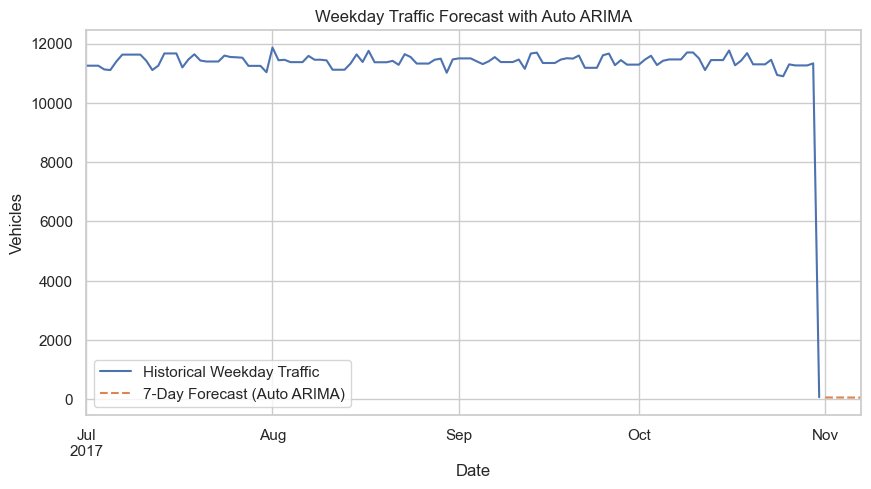

In [ ]:
# Plot historical + forecast
plt.figure(figsize=(10, 5))
weekday_series.plot(label='Historical Weekday Traffic')
forecast_index = pd.date_range(start=weekday_series.index[-1] + pd.Timedelta(days=1), periods=n_days)
pd.Series(forecast_auto, index=forecast_index).plot(label='7-Day Forecast (Auto ARIMA)', linestyle='--')
plt.title("Weekday Traffic Forecast with Auto ARIMA")
plt.xlabel("Date")
plt.ylabel("Vehicles")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 12.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.3 MB 12.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.3 MB 12.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.3 MB 12.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.3 MB 12.7 MB/s eta 0:00:01
   ------ --------------------------------- 2.1/13.3 MB 1.6 MB/s eta 0:00:07
   --------- ------------------------------ 3.1/13.3 MB 2.1 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/13.3 MB 2.1 MB/s eta 0:00:05
   ------------ --------------------------- 4.2/13.3 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 5.2/13.3 MB 2.5 MB/s eta 0:00:04
   --------------------- ------------------ 7.1/13.3 MB 2.9 MB/s eta 0:00:03
   ---------------------- ----------------- 7.3/13.3 MB 3.0 MB/s eta 0:00:02
 

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare the weekday traffic data
weekday_df = pivot_type['Weekday'].fillna(method='ffill').fillna(method='bfill').reset_index()
weekday_df.columns = ['ds', 'y']
weekday_df['ds'] = pd.to_datetime(weekday_df['ds'])
weekday_df['y'] = weekday_df['y'].clip(lower=0)  # No negatives

weekday_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_6032\3179753763.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekday_df = pivot_type['Weekday'].fillna(method='ffill').fillna(method='bfill').reset_index()


,ds,y
0,2017-07-01,11253.0
1,2017-07-02,11253.0
2,2017-07-03,11253.0
3,2017-07-04,11127.0
4,2017-07-05,11105.0


In [ ]:
# Initialize and fit the model
m = Prophet()
m.fit(weekday_df)


02:59:59 - cmdstanpy - INFO - Chain [1] start processing
03:00:06 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create a dataframe to hold future dates
future = m.make_future_dataframe(periods=14)

# Forecast
forecast = m.predict(future)

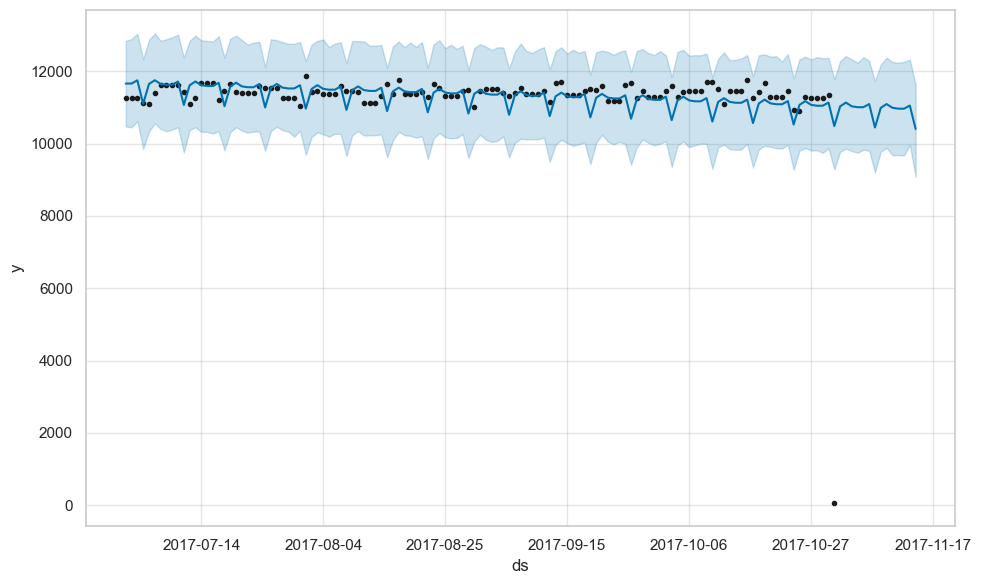

In [ ]:
# Visualize the forecast
fig1 = m.plot(forecast)

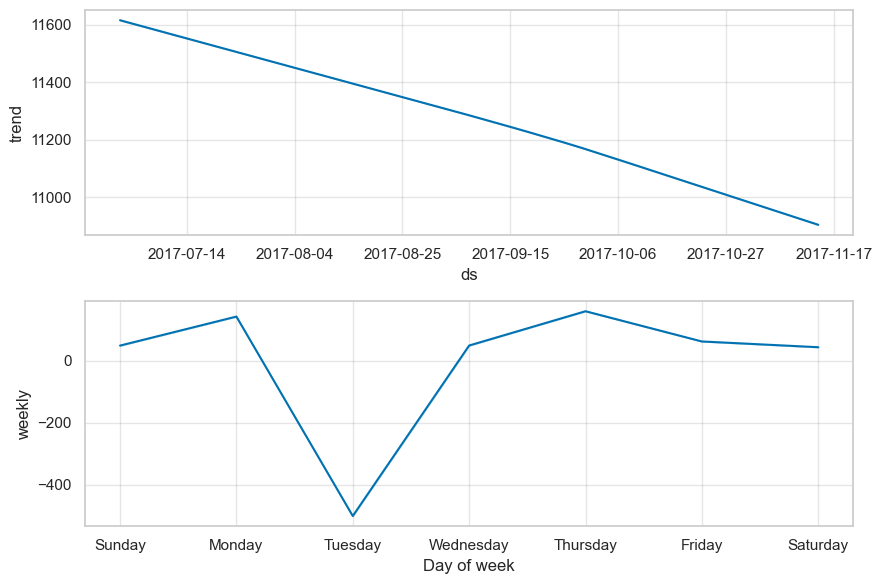

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
#Weekly seasonality using Prophet

In [ ]:
# More responsive weekly seasonality
m = Prophet(weekly_seasonality=True, daily_seasonality=False)
m.add_seasonality(name='weekly', period=7, fourier_order=10)
m.fit(weekday_df)


03:07:30 - cmdstanpy - INFO - Chain [1] start processing
03:07:31 - cmdstanpy - INFO - Chain [1] done processing


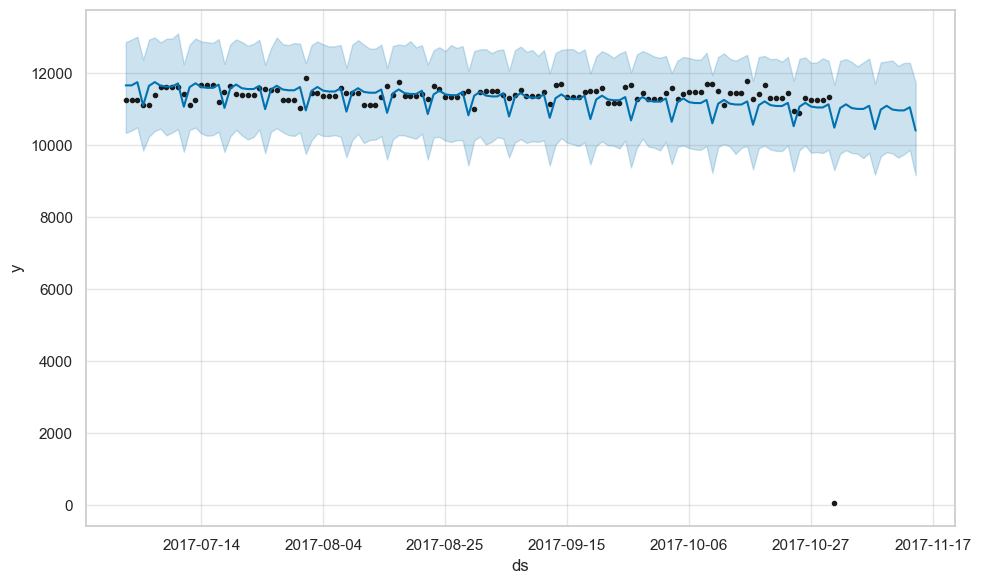

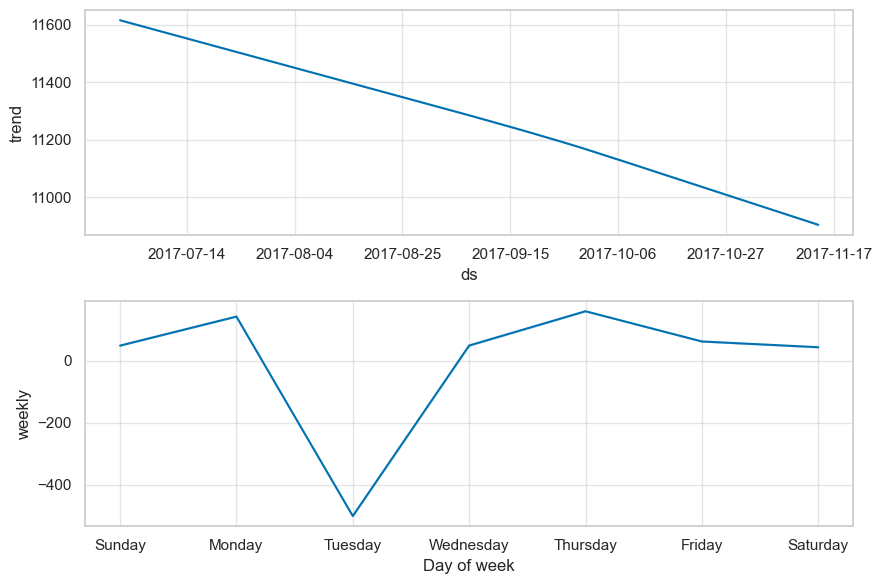

In [ ]:
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)

# Plot forecast
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


03:08:39 - cmdstanpy - INFO - Chain [1] start processing
03:08:39 - cmdstanpy - INFO - Chain [1] done processing


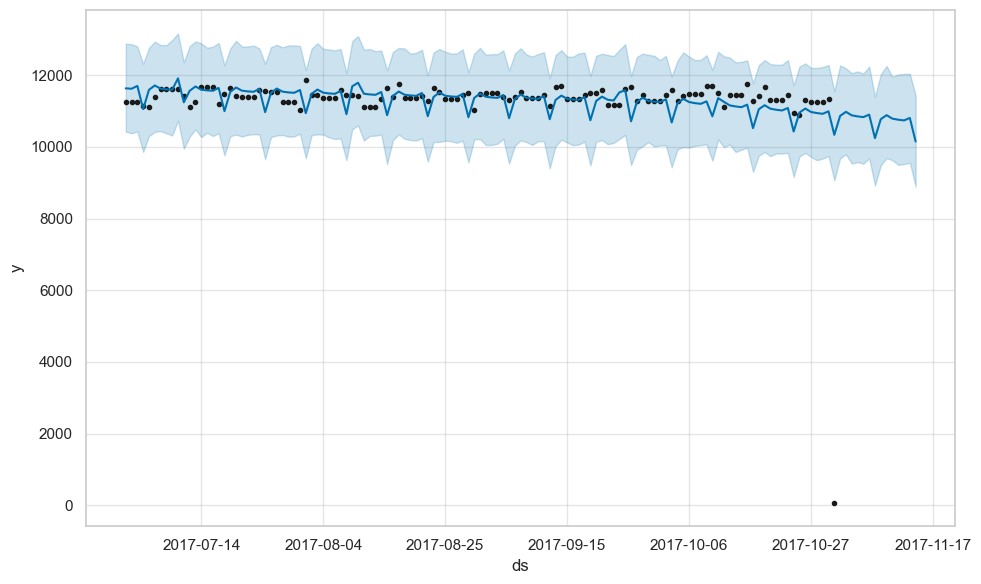

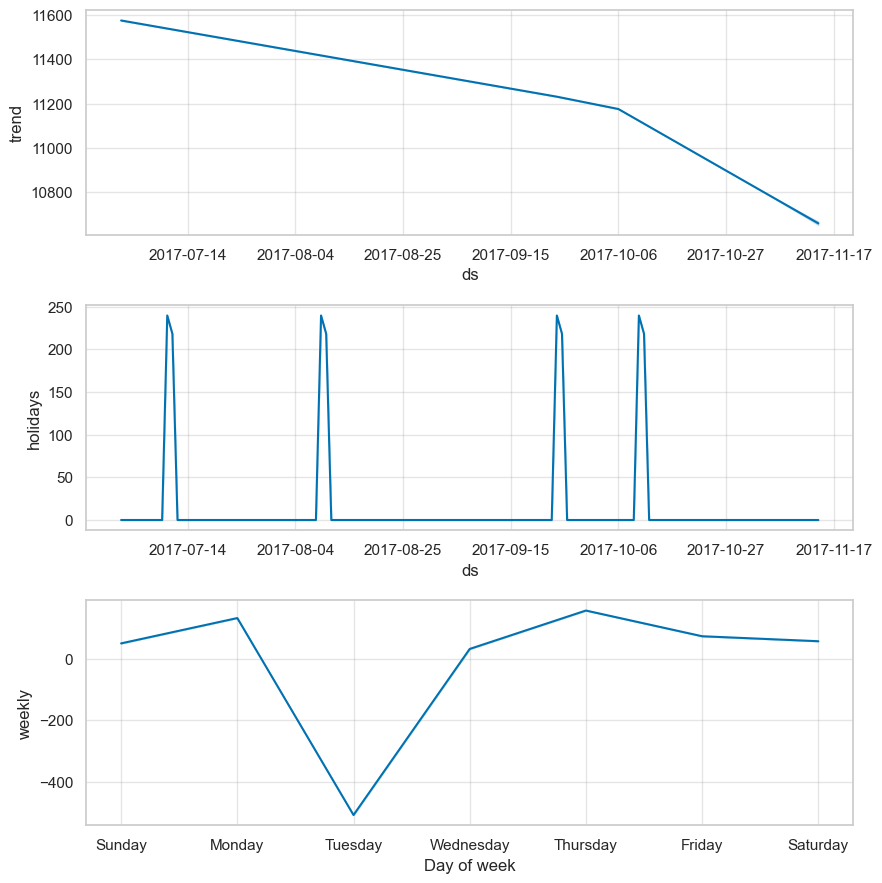

In [ ]:
# Create custom holidays (from your mock data)
holidays = pd.DataFrame({
    'holiday': 'traffic_holiday',
    'ds': pd.to_datetime(['2017-07-10', '2017-08-09', '2017-09-24', '2017-10-10']),
    'lower_window': 0,
    'upper_window': 1,
})

# Rebuild model with holidays
m = Prophet(holidays=holidays, weekly_seasonality=True)
m.fit(weekday_df)

# Forecast again
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)

# Plot
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [ ]:
# Group the entire dataset by date to get total traffic
total_daily = df.groupby(df['Timestamp'].dt.date)['Vehicles'].sum().reset_index()
total_daily.columns = ['ds', 'y']
total_daily['ds'] = pd.to_datetime(total_daily['ds'])
total_daily['y'] = total_daily['y'].clip(lower=0)


In [ ]:
from prophet import Prophet

# Create and train the Prophet model
m_total = Prophet()
m_total.fit(total_daily)


03:10:38 - cmdstanpy - INFO - Chain [1] start processing
03:10:39 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Future dates
future_total = m_total.make_future_dataframe(periods=14)
forecast_total = m_total.predict(future_total)


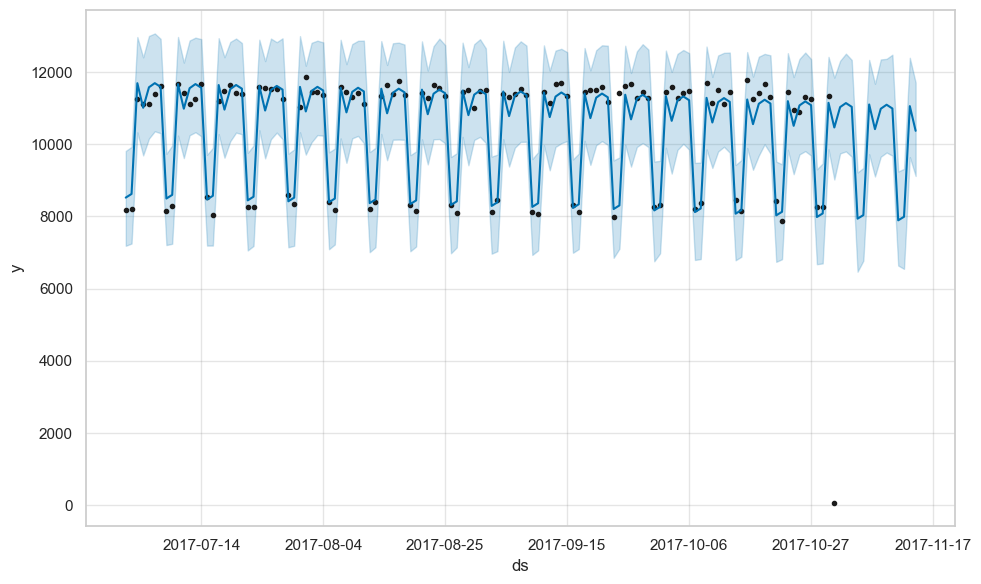

In [ ]:
# Forecast plot
fig_total = m_total.plot(forecast_total)


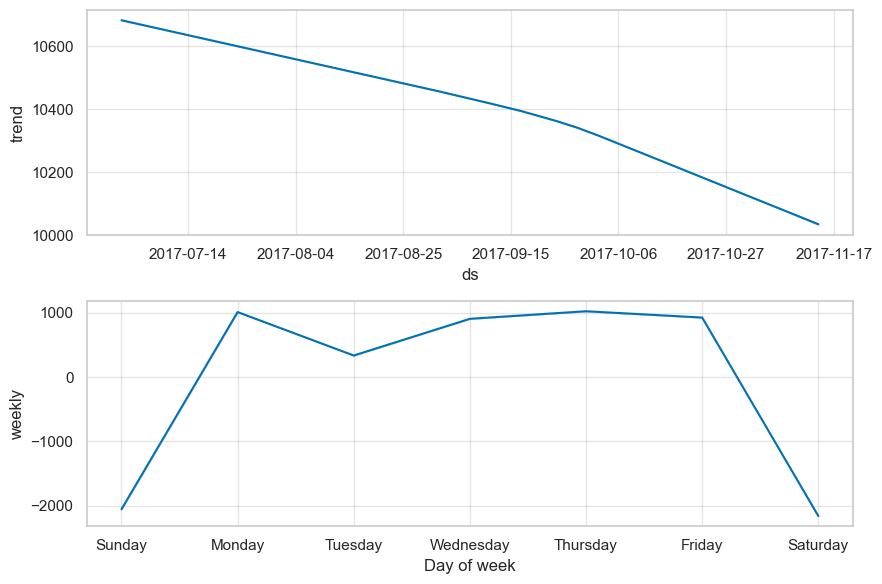

In [ ]:
fig_components_total = m_total.plot_components(forecast_total)


In [ ]:
!pip install streamlit